<a href="https://colab.research.google.com/github/yaroslavzabavchuk/Python-Project/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Підключаємо Google Drive та імпортуємо необхідні бібліотеки**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/Final_project/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Final_project


**Імпортуємо необхідні дані**

In [ ]:
countries = pd.read_csv('countries.csv')
events = pd.read_csv('events.csv')
products = pd.read_csv('products.csv')

# Маємо три таблиці в кожній з яких є певна інформація.

1.   Countries(Інформація про країни, регіони та суб-регіони)
2.   Events(Основна інформація про замовлення: Дата замовлення, айді замовлення,кількість продажів, вартість та собівартість товару)
3.   Products(Інформація про товар.)   


**Шукаємо пропущені значення, у разі необхідності заповнюємо їх або видаляєм**

In [ ]:
# Searching for msissing values
countries.isnull().sum() / countries.shape[0] * 100
events.isnull().sum() / events.shape[0] * 100
products.isnull().sum() / products.shape[0] * 100
print(events.isnull().sum() / events.shape[0] * 100)
print(countries.isnull().sum() / countries.shape[0] * 100)
print(products.isnull().sum() / products.shape[0] * 100 )

# Filling Country code with "Unknown"

countries['region'].fillna('Unknown', inplace=True)


#Filling "Units sold" with median values
events['units_sold'].fillna(events['units_sold'].median(), inplace=True)


order_id          0.0
order_date        0.0
ship_date         0.0
order_priority    0.0
alpha-3           0.0
products_id       0.0
sales_channel     0.0
units_sold        0.0
unit_price        0.0
unit_cost         0.0
dtype: float64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.000000
sub-region    0.000000
dtype: float64
products_id    0.0
item_type      0.0
dtype: float64


/tmp/ipython-input-103-2226750309.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  countries['region'].fillna('Unknown', inplace=True)
/tmp/ipython-input-103-2226750309.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

**Перевіряєм на наявність дуплікатів**

In [ ]:
# Cheking for duplicates
events.duplicated().sum()
products.duplicated().sum()
countries.duplicated().sum()

np.int64(0)

**Обєднюємо три таблиці в одну та корегуємо значення для крашої читабельності**

In [ ]:
# Joining tables
events.rename(columns={'country_code': 'alpha-3'}, inplace=True)
events_countries = pd.merge(events, countries, on='alpha-3')
events.rename(columns={"product_id": 'products_id'}, inplace=True)
sales_data = pd.merge(events_countries, products, on='products_id')
sales_data.rename(columns={'name': 'country'}, inplace=True)

# Removing column "alpha-2" because it is no longer needed
sales_data.drop(columns=['alpha-2'], inplace=True)

# Cheking missing values
sales_data.isnull().sum() # No missing values were found

# Replacing columns for better readability
col = sales_data.pop('item_type')
sales_data.insert(4, 'item_type', col)
col = sales_data.pop("alpha-3")
sales_data.insert(11, "alpha-3", col)
sales_data.head()

,order_id,order_date,ship_date,order_priority,item_type,products_id,sales_channel,units_sold,unit_price,unit_cost,country,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,Cereal,2103,Online,650.0,205.70,117.11,Norway,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,Cereal,2103,Offline,1993.0,205.70,117.11,Serbia,SRB,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,Clothes,2455,Online,1171.0,109.28,35.84,Montenegro,MNE,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,Beverages,1270,Offline,7648.0,47.45,31.79,Serbia,SRB,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,Office Supplies,8681,Online,2220.0,651.21,524.96,Slovakia,SVK,Europe,Eastern Europe


In [ ]:
sales_data['sales_channel'] = sales_data['sales_channel'].replace('online', 'Online')

sales_data.head()

,order_id,order_date,ship_date,order_priority,item_type,products_id,sales_channel,units_sold,unit_price,unit_cost,country,alpha-3,region,sub-region,revenue,cost,profit
0,100640618,2014-10-08,2014-10-18,M,Cereal,2103,Online,650.0,205.70,117.11,Norway,NOR,Europe,Northern Europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,Cereal,2103,Offline,1993.0,205.70,117.11,Serbia,SRB,Europe,Southern Europe,409960.10,233400.23,176559.87
2,102230632,2017-05-13,2017-06-13,L,Clothes,2455,Online,1171.0,109.28,35.84,Montenegro,MNE,Europe,Southern Europe,127966.88,41968.64,85998.24
3,103435266,2012-08-11,2012-09-18,H,Beverages,1270,Offline,7648.0,47.45,31.79,Serbia,SRB,Europe,Southern Europe,362897.60,243129.92,119767.68
4,103450715,2015-03-15,2015-04-18,H,Office Supplies,8681,Online,2220.0,651.21,524.96,Slovakia,SVK,Europe,Eastern Europe,1445686.20,1165411.20,280275.00


**Ключеві метрики діяльності компаніїї**

In [ ]:
sales_data['revenue'] = sales_data['units_sold'] * sales_data['unit_price']
sales_data['cost'] = sales_data['units_sold'] * sales_data['unit_cost']
sales_data['profit'] = sales_data['revenue'] - sales_data['cost']

total_revenue = sales_data['revenue'].sum()
total_cost = sales_data['cost'].sum()
net_profit = sales_data['profit'].sum()
print(f"Загальний прибуток (Total Revenue): ${total_revenue:,.2f}")
print(f"Загальні витрати (Total Cost): ${total_cost:,.2f}")
print(f"Чистий прибуток (Net Profit): ${net_profit:,.2f}")

total_untis_sold = sales_data['units_sold'].sum()
print(f"Загальна кількість проданих одиниць (Total Units Sold): {total_untis_sold:,.2f}")

total_orders = sales_data["order_id"].nunique()
print(f"Загальна кількість замовлень (Total Orders): {total_orders}")

total_countries = sales_data["country"].nunique()
print(f"Загальна кількість охоплених країн (Total Countries): {total_countries}")

total_regions = sales_data["region"].nunique()
print(f"Загальна кількість охоплених регіонів (Total Regions): {total_regions}")

Загальний прибуток (Total Revenue): $1,601,482,723.70
Загальні витрати (Total Cost): $1,127,365,514.52
Чистий прибуток (Net Profit): $474,117,209.18
Загальна кількість проданих одиниць (Total Units Sold): 6,181,595.00
Загальна кількість замовлень (Total Orders): 1248
Загальна кількість охоплених країн (Total Countries): 45
Загальна кількість охоплених регіонів (Total Regions): 2


**Початок візуалізації основних ключових показників**

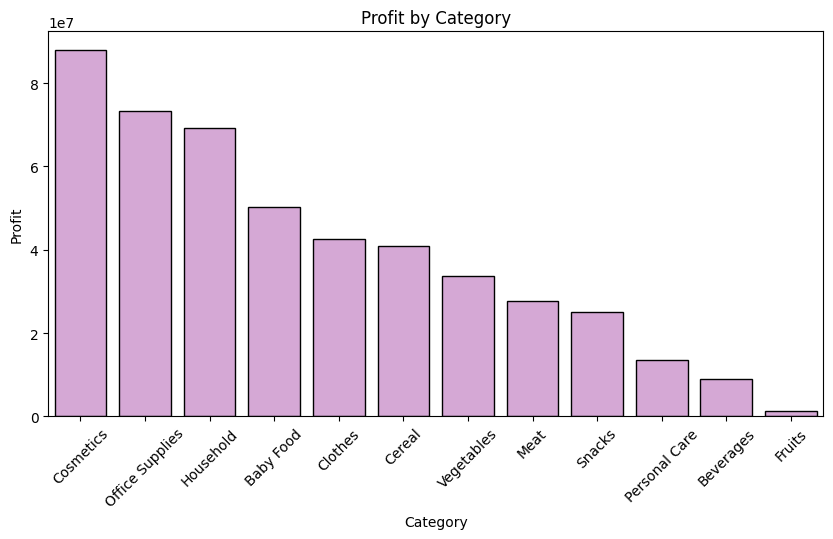

In [ ]:
# Visualising
order = sales_data.groupby("item_type")["profit"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="item_type", y="profit", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

**Найбільше чистого доходу приходить від категорії "Cosmetics"**

**Найменше приносить категорія "Fruits"**

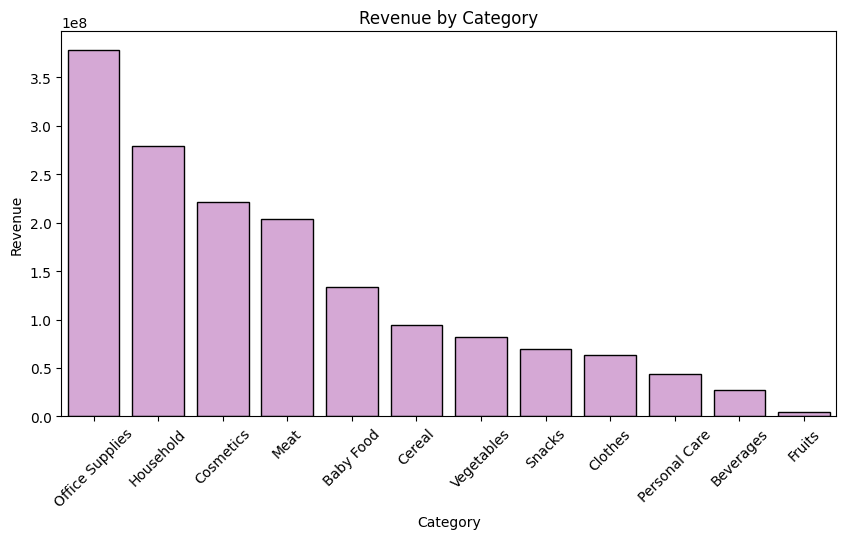

In [ ]:
order = sales_data.groupby("item_type")["revenue"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="item_type", y="revenue", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

**Найбільший загальний дохід приносить категорія "Office Supplies"**

**Найменший дохід залишаєьться "Fruits"**

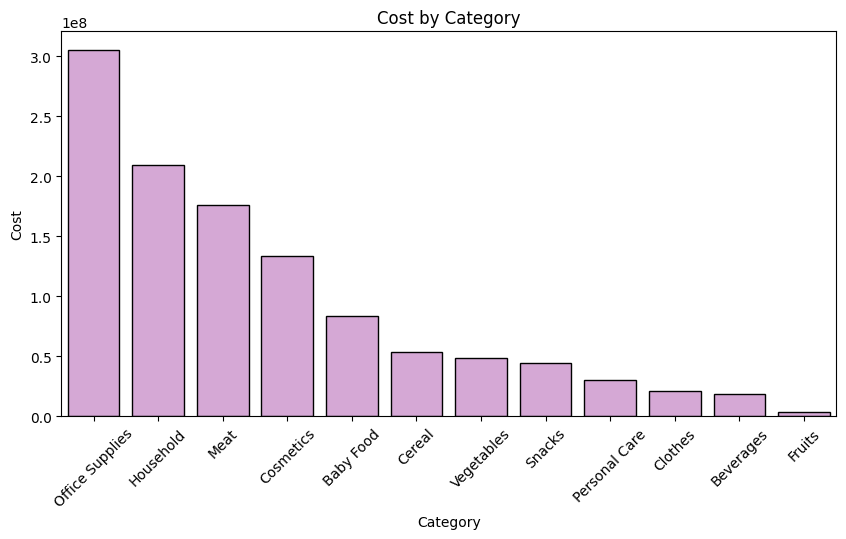

In [ ]:
order = sales_data.groupby("item_type")["cost"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="item_type", y="cost", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Cost by Category")
plt.xlabel("Category")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.show()

**Найбільше витрат приходить на категорію "Office Supplies", проте ця категорія приносить найбільший дохід, тому не дивно що компанія вкладає в цю категорію більше.**

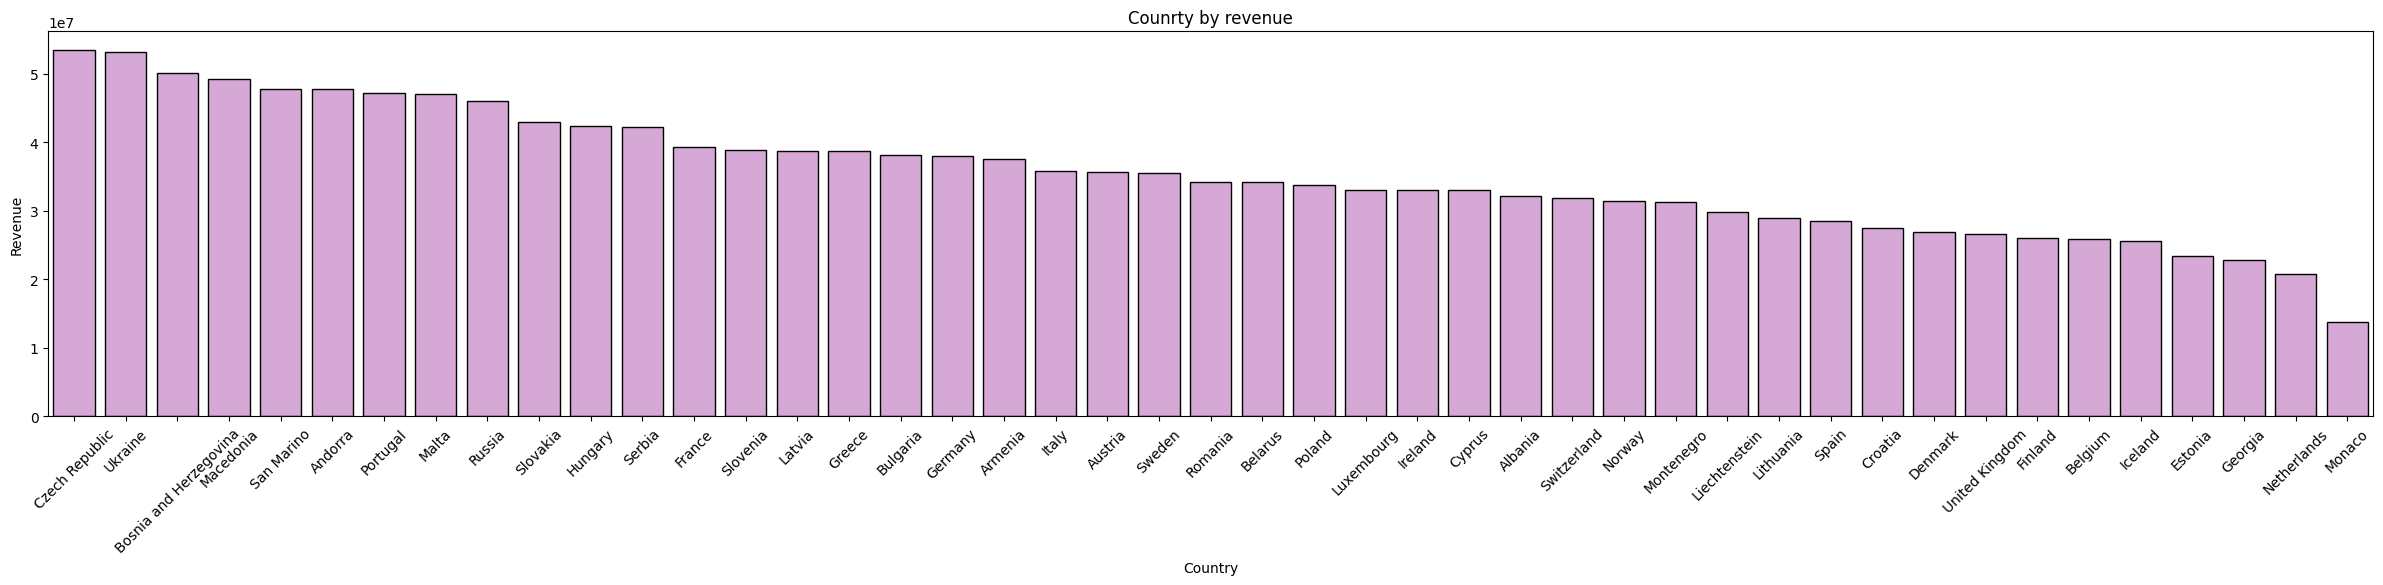

In [ ]:
order = sales_data.groupby("country")["revenue"].sum().sort_values(ascending=False).index

plt.figure(figsize=(30, 5))
sns.barplot(data=sales_data, x="country", y="revenue", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Counrty by revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

**Компанія продає та доставляє свої товари в 45 країн, найприбутковіші країни це Чехія та Україна де різинця між доходом зовсім мінімальна.**

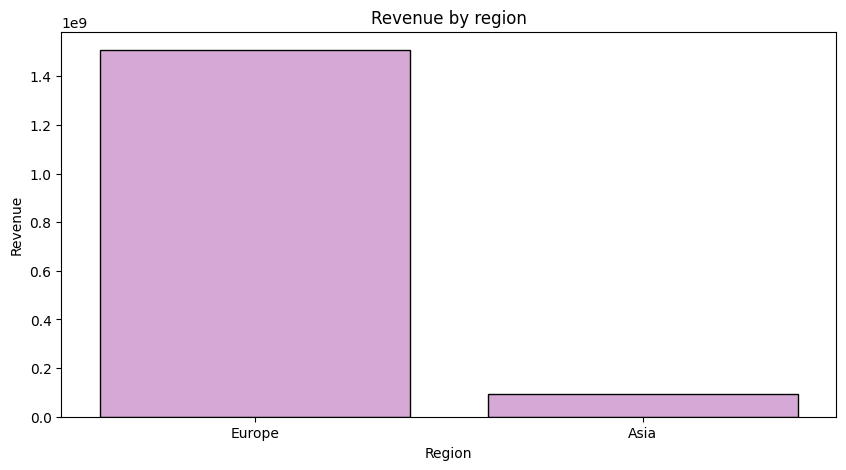

In [ ]:
order = sales_data.groupby("region")["revenue"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="region", y="revenue", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Revenue by region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

**Найбільший прибуток приходить з Європи, проте є країни із Азії, які приносять також певний дохід**

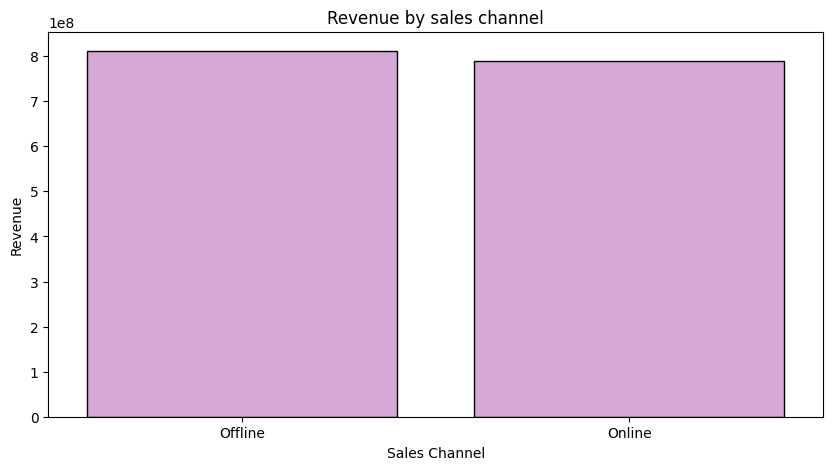

In [ ]:
order = sales_data.groupby("sales_channel")["revenue"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="sales_channel", y="revenue", errorbar=("ci", False), color="plum", estimator=np.sum, order=order, edgecolor="black")
plt.title("Revenue by sales channel")
plt.xlabel("Sales Channel")
plt.ylabel("Revenue")
plt.show()

**Дохід між онлайн та оффлайн є рівномірним, цей гафік показує що обидва канала продажу приносять одинакову вигоду для компанії**

/tmp/ipython-input-195-2215825003.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:plum'` for the same effect.

  sns.barplot(data=sales_data, x="item_type", y="profit", errorbar=("ci", False), color="plum", hue='sales_channel', estimator=np.sum, order=order, edgecolor="black")


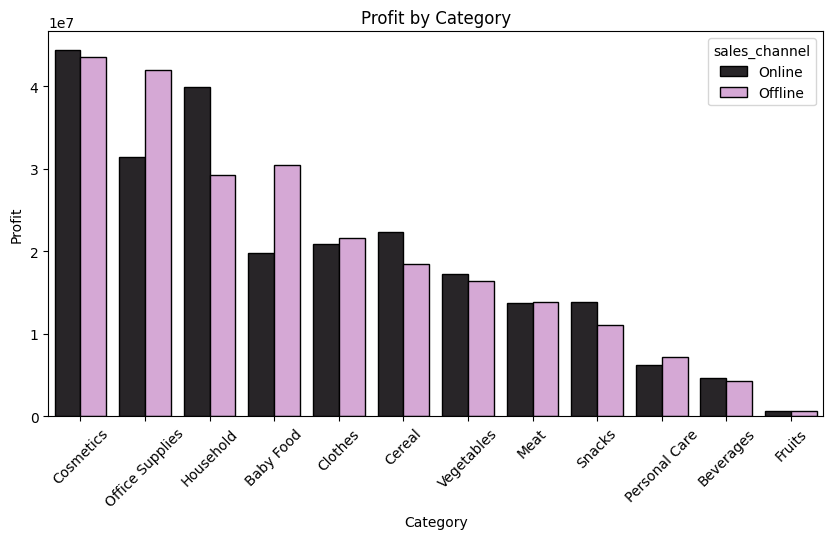

In [ ]:
order = sales_data.groupby("item_type")["profit"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="item_type", y="profit", errorbar=("ci", False), color="plum", hue='sales_channel', estimator=np.sum, order=order, edgecolor="black")
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

**На цьому графіку бачимо що є 3 категорії з суттєвою різницею доходу через канали продажів**

**Office supplies та Baby food має значну частину купівель оффлайн коли Household більшість доходу приносить від онлайн прдажів**


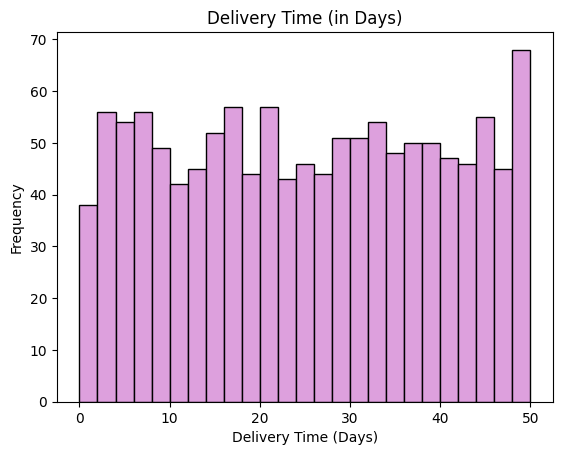

In [ ]:
sales_data['delivert_time_days'] = sales_data['delivert_time'].dt.days


plt.hist(sales_data["delivert_time_days"], bins=25, color="plum", edgecolor="black")
plt.title("Delivery Time (in Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Frequency")
plt.show()

**На графіку бачимо час доставки товару до покупців**

**В середньому доставка тримває до 30 днів, проте є часті випадки коли доставка відбувається більше 40 днів**

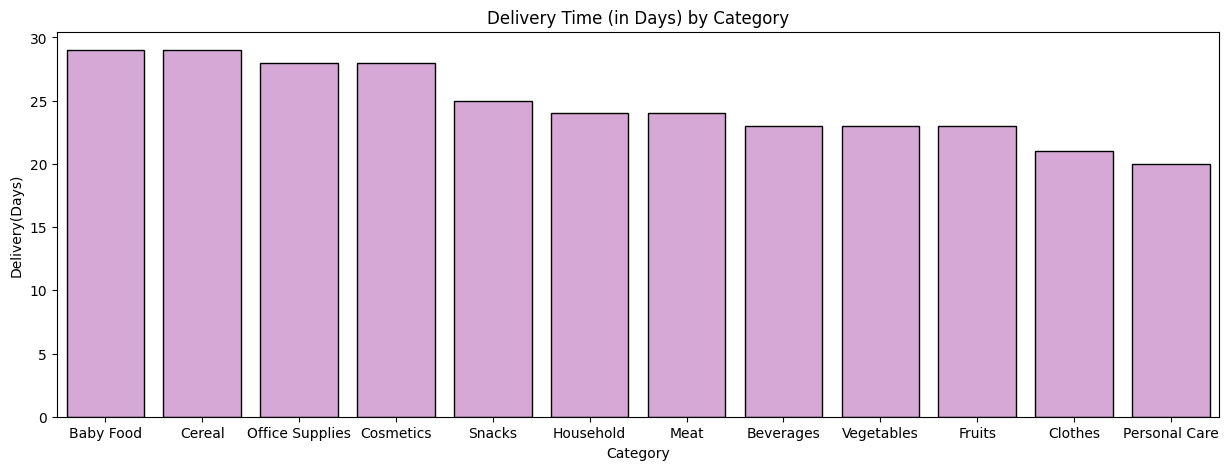

In [ ]:
order_by_delivery_time = sales_data.groupby("item_type")["delivert_time_days"].median().sort_values(ascending=False).index

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_data, x="item_type", y="delivert_time_days", errorbar=("ci", False), color="plum", estimator=np.median, order=order_by_delivery_time, edgecolor="black")
plt.title("Delivery Time (in Days) by Category")
plt.xlabel("Category")
plt.ylabel("Delivery(Days)")
plt.show()

**Тут видно категорії та за який термін в середньому вони доствляются, бачимо дві категорії, які приносять компанії найбільше доходу"Office supplies" та "Cosmetics", вони доставляються в середньому 28 днів, можлиов потрібно покращити логістику цих категорій для збільшення доходів в майбутньому**

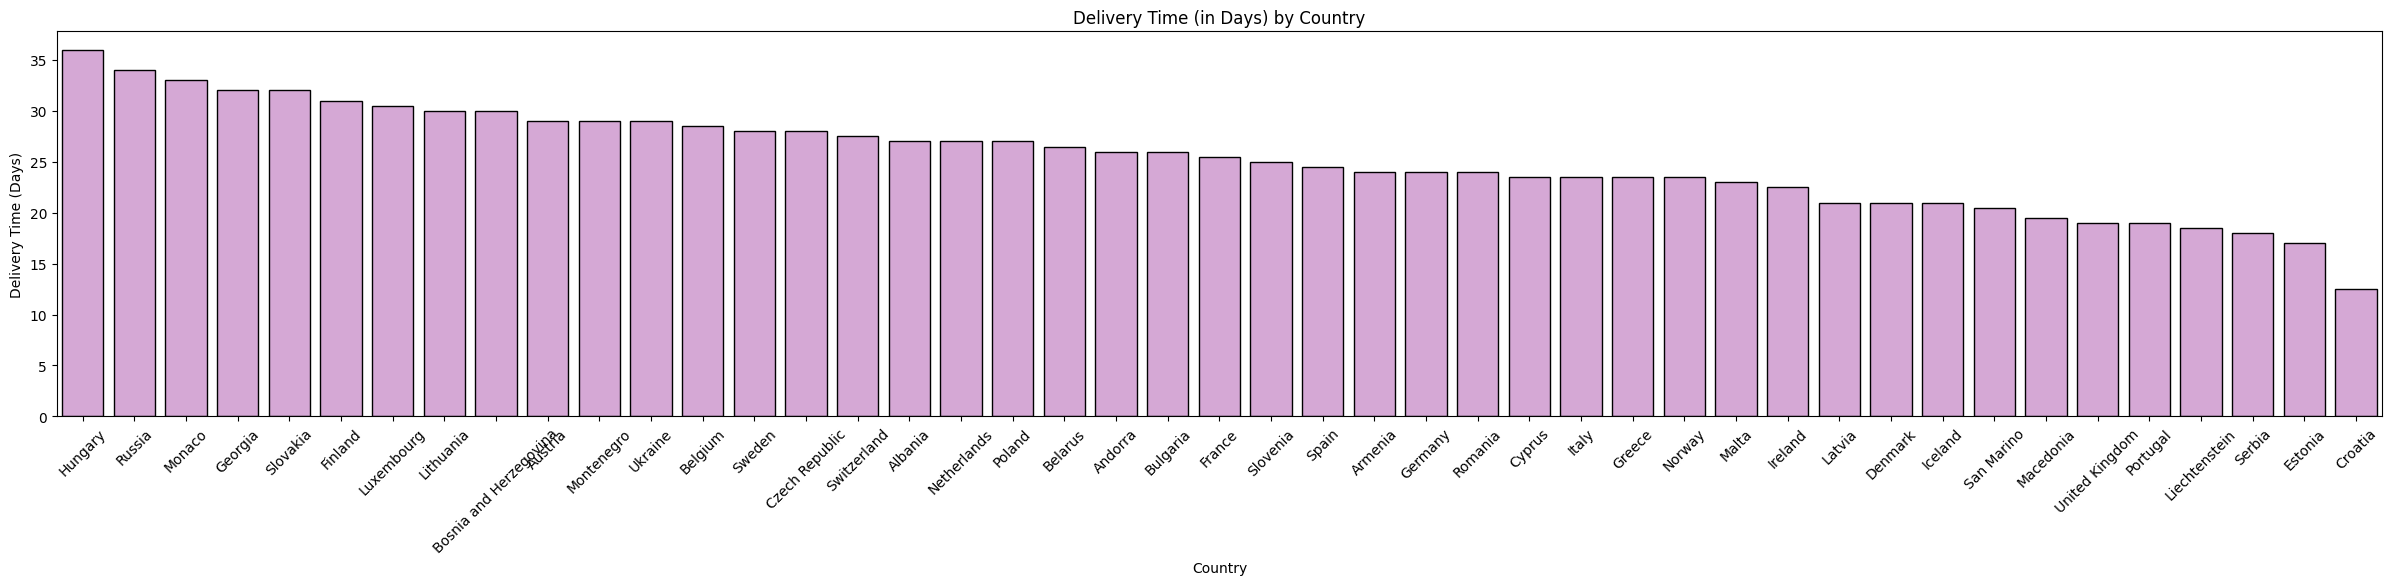

In [ ]:
delivery_days_by_country = sales_data.groupby("country")["delivert_time_days"].median().sort_values(ascending=False)

plt.figure(figsize=(30, 5))
sns.barplot(data=sales_data, x="country", y="delivert_time_days", errorbar=("ci", False), color="plum", estimator=np.median, order=delivery_days_by_country.index, edgecolor="black")
plt.title("Delivery Time (in Days) by Country")
plt.xlabel("Country")
plt.ylabel("Delivery Time (Days)")
plt.xticks(rotation=45)
plt.show()

**Доставка в розрізі країн**

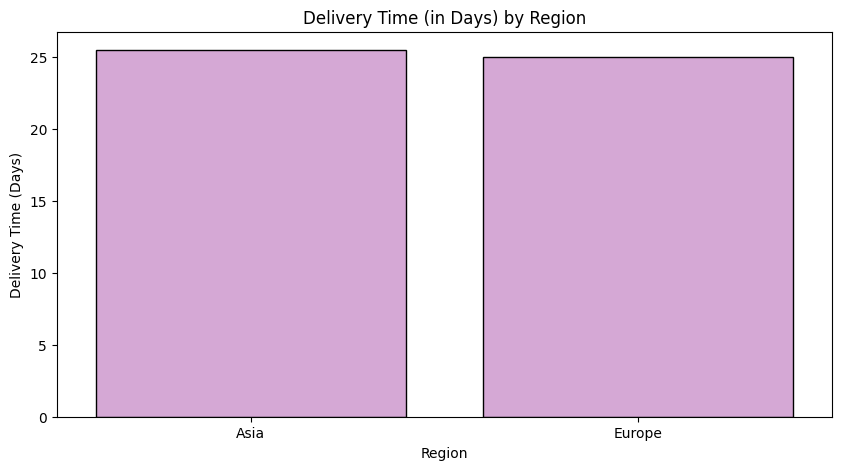

In [ ]:
delivery_days_by_region = sales_data.groupby("region")["delivert_time_days"].median().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="region", y="delivert_time_days", errorbar=("ci", False), color="plum", estimator=np.median, order=delivery_days_by_region.index, edgecolor="black")
plt.title("Delivery Time (in Days) by Region")
plt.xlabel("Region")
plt.ylabel("Delivery Time (Days)")
plt.show()

**Доставка в розрізі регіонів**

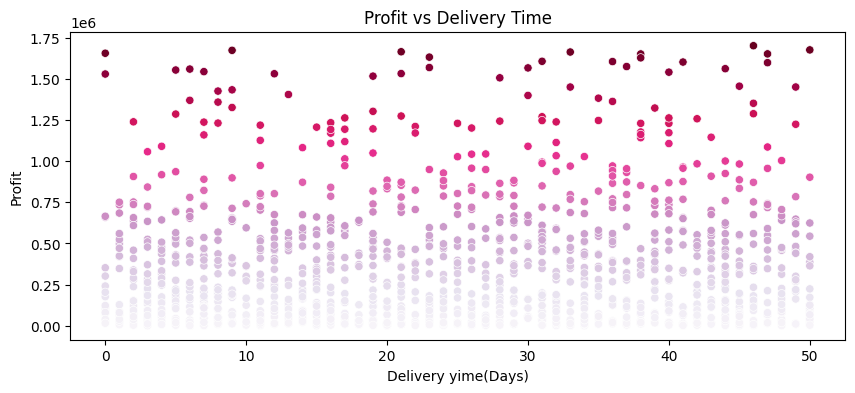

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=sales_data, x='delivert_time_days', y='profit', hue='profit', palette="PuRd", legend=False)
plt.title('Profit vs Delivery Time')
plt.xlabel('Delivery yime(Days)')
plt.ylabel('Profit')
plt.show()


**Співвідношення доходу та часу доставки**

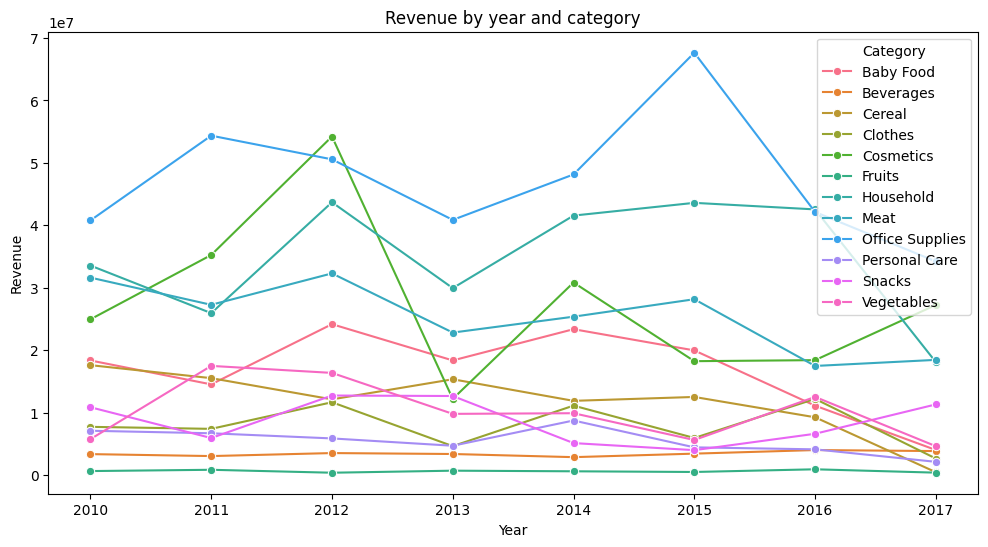

In [ ]:
sales_by_product_year = sales_data.groupby(['year', 'item_type'])['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_product_year, x='year', y='revenue', hue='item_type', marker='o')
plt.title('Revenue by year and category')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.legend(title='Category')
plt.show()

**На графіку бачимо попит на товари по роках, присутня сезоннсіть таких товарів як "Office supplies" та "Cosmetics"**

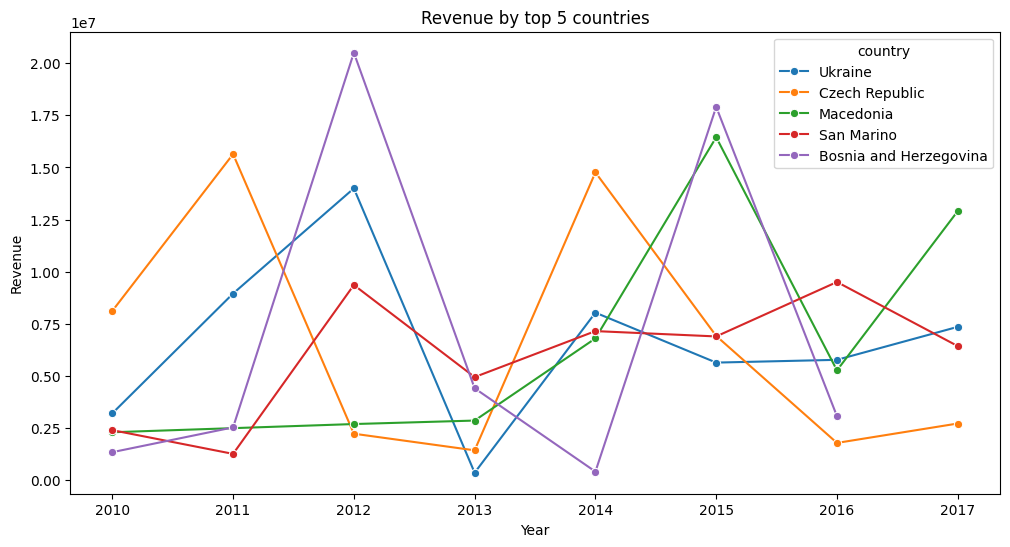

In [ ]:
# Filter sales_data to include only the top 5 countries
top_5_countries = top_5_countries_by_revenue.index
sales_data_top_5 = sales_data[sales_data['country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_top_5, x='year', y='revenue', hue='country', marker='o', estimator=sum, errorbar=None)
plt.title('Revenue by top 5 countries')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.legend(title='country')
plt.show()

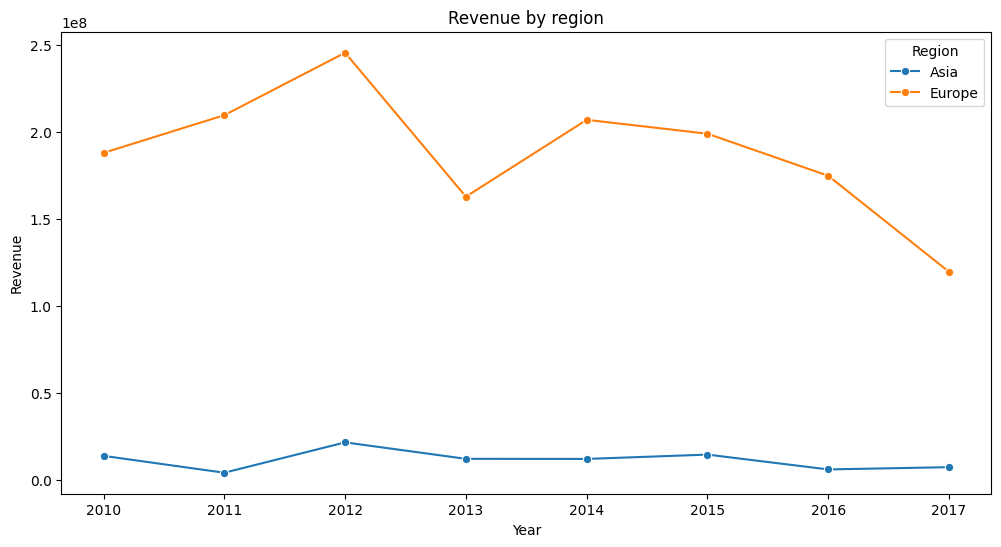

In [ ]:
sales_by_region = sales_data.groupby(['region', 'year'])['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_region, x='year', y='revenue', hue='region', marker='o')
plt.title('Revenue by region')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.legend(title='Region')
plt.show()

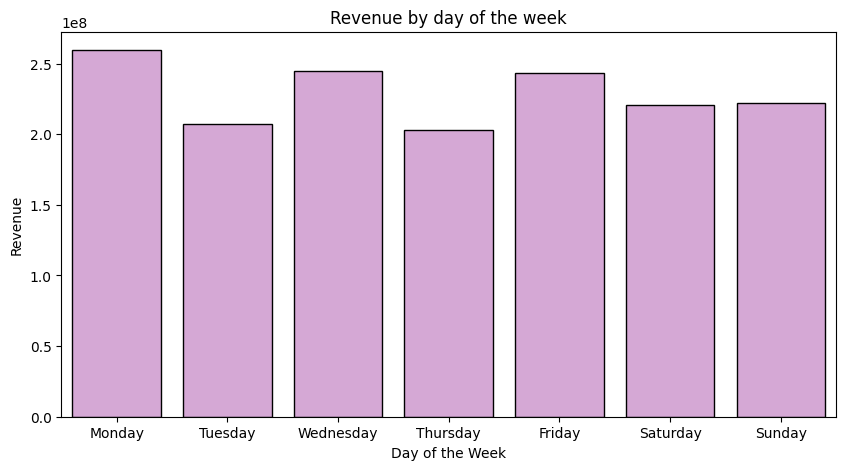

In [ ]:
sales_data['week_day'] = sales_data['order_date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

order_by_weekday = sales_data.groupby("week_day")["revenue"].sum().reindex(days_order).index

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x="week_day", y="revenue", errorbar=("ci", False), color="plum", estimator=np.sum, edgecolor="black", order=days_order)
plt.title("Revenue by day of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Revenue")
plt.show()

**Дохідність по дням тижня, бачимо що велику частину дохідності припадає на Понеділок потім на середу та пятницю, також бачим що є вища дохідність у вихідні дні.**

# Висновок

**Компанія займаєтья продажамі товару з 2010 року та продає 12 категорій товарів такі як:**

*   Cosmetics
*   Office Supplies
*   Household
*   Baby food
*   Clothes
*   Cereal
*   Vegetables
*   Meat
*   Snaks
*   Personal Care
*   Beverages
*   Fruits

Загальний прибуток компанії: $1,601,482,723.70

Загальні витрати компанії: $1,127,365,514.52

Чистий прибуток компанії: $474,117,209.18

Загальна кількість проданих одиниць: 6,181,595.00

Загальна кількість замовлень: 1248

Загальна кількість охоплених країн: 45

Кількість охоплених регіонів: 2

Середній час доставки товару: 30 днів

Найприбутковіші категорії товарів такі як Office Supplies та Cosmetics мають сезонність, скорішу за все товару закуповають оптом.

Білшість доходу для компанії припадають на понеділок та середу, також є значний прибуток у вихідні дні.
Це може бути повязано із тим що компанія продає свої товари оптом іншим компаніям, де замовлення як правило починають робити з початку тижня.